# Classical regression models

* KNN
* Kernel SVM
* Random Forest

In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from training.creating_dataset import load_and_preprocess_data
from training.constants import FEATURES, DATASET_FILES, ORDERED_CHARACTERISTICS_FULL


bestiaries = load_and_preprocess_data(
    [f"../../pathfinder_2e_remaster_data/{f}" for f in DATASET_FILES], FEATURES
)

columns = [col for col in bestiaries.columns if col not in ["book", "level"]]
scaler = MinMaxScaler()
min_max_df = pd.DataFrame()
min_max_df[columns] = pd.DataFrame(
    scaler.fit_transform(bestiaries[columns]), index=bestiaries.index
)
min_max_df["book"] = bestiaries["book"]
min_max_df["level"] = bestiaries["level"]
bestiaries = min_max_df
bestiaries = bestiaries[ORDERED_CHARACTERISTICS_FULL + ["book", "level"]]
bestiaries.head()

,str,dex,con,int,wis,cha,ac,hp,perception,fortitude,...,area-damage_weakness,cold_weakness,cold-iron_weakness,evil_weakness,fire_weakness,good_weakness,slashing_weakness,splash-damage_weakness,book,level
0,0.588235,0.588235,0.357143,0.200000,0.470588,0.529412,0.509434,0.252087,0.156522,0.425532,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #164: Hands of the Devil,8
1,0.588235,0.411765,0.428571,0.600000,0.411765,0.411765,0.396226,0.123539,0.130435,0.297872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #163: Ruins of Gauntlight,5
2,0.529412,0.470588,0.214286,0.400000,0.470588,0.352941,0.320755,0.078464,0.069565,0.170213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #163: Ruins of Gauntlight,3
3,0.352941,0.529412,0.214286,0.333333,0.470588,0.352941,0.358491,0.048414,0.104348,0.170213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #164: Hands of the Devil,3
4,0.588235,0.588235,0.500000,0.466667,0.529412,0.588235,0.490566,0.198664,0.156522,0.361702,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #164: Hands of the Devil,8


In [2]:
import os
from training.splitting_dataset import split_dataframe, get_date_books_mapping

os.chdir("../../training")
books_dates_map = get_date_books_mapping()

books_to_include = [
    book for _, row in books_dates_map["books"].iteritems() for book in row
]
bestiaries = bestiaries[bestiaries["book"].isin(books_to_include)]
X_train, X_test, y_train, y_test = split_dataframe(bestiaries)
os.chdir("../notebooks/models")

In [5]:
X_test

,str,dex,con,int,wis,cha,ac,hp,perception,fortitude,...,poison_resistance,slashing_resistance,area-damage_weakness,cold_weakness,cold-iron_weakness,evil_weakness,fire_weakness,good_weakness,slashing_weakness,splash-damage_weakness
651,0.588235,0.470588,0.428571,0.000000,0.411765,0.176471,0.452830,0.148581,0.104348,0.340426,...,0.000000,0.25,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
652,0.000000,0.705882,0.357143,0.666667,0.588235,0.705882,0.547170,0.290484,0.191304,0.382979,...,0.000000,0.00,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0
656,0.411765,0.588235,0.285714,0.400000,0.411765,0.588235,0.396226,0.081803,0.095652,0.191489,...,0.000000,0.25,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
657,0.588235,0.647059,0.428571,0.533333,0.411765,0.529412,0.490566,0.207012,0.139130,0.340426,...,0.000000,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
659,0.647059,0.470588,0.428571,0.466667,0.647059,0.588235,0.490566,0.273790,0.156522,0.297872,...,0.000000,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,0.823529,0.647059,0.571429,0.666667,0.764706,0.647059,0.773585,0.632721,0.260870,0.595745,...,0.000000,0.00,0.0,0.0,0.75,0.0,0.0,0.0,0.0,0.0
1477,0.647059,0.352941,0.571429,0.466667,0.470588,0.411765,0.490566,0.228715,0.139130,0.382979,...,0.000000,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1478,0.823529,0.588235,0.571429,0.200000,0.588235,0.529412,0.754717,0.632721,0.278261,0.680851,...,0.000000,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1479,0.000000,0.470588,0.285714,0.666667,0.411765,0.529412,0.509434,0.248748,0.165217,0.404255,...,0.000000,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0


## KNeighbors

In [3]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV


clf = KNeighborsRegressor()

hyper_params = {
    "leaf_size": list(range(50, 100, 10)),
    "weights": ["uniform", "distance"],
    "metric": ["minkowski", "manhattan", "euclidean"],
    "n_neighbors": list(range(1, 51)),
}

model = GridSearchCV(
    estimator=clf,
    param_grid=hyper_params,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=2,
    return_train_score=True,
    n_jobs=-1,
)
model.fit(X_train, y_train)

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'leaf_size': [50, 60, 70, 80, 90],
                         'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [4]:
model.best_params_

{'leaf_size': 50,
 'metric': 'manhattan',
 'n_neighbors': 5,
 'weights': 'distance'}

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


y_pred = model.predict(X_test)

print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

1.2435195397196206
2.817641490858506


In [6]:
y_pred = model.predict(X_train)

print(mean_absolute_error(y_train, y_pred))
print(mean_squared_error(y_train, y_pred))

0.0
0.0


## SVM kernel=rbf

In [7]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV


svm = SVR(kernel="rbf", max_iter=10000)
hyper_params = {"C": [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5]}

model = GridSearchCV(
    estimator=svm,
    param_grid=hyper_params,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=2,
    return_train_score=True,
    n_jobs=-1,
)
model.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


C:\Users\jolka\OneDrive\Dokumenty\mgr\Predictive-ML-in-TTRPG-game-design\venv\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


GridSearchCV(cv=5, estimator=SVR(max_iter=10000), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0,
                               10000.0, 100000.0]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [8]:
model.best_params_

{'C': 10.0}

In [9]:
svm = SVR(kernel="rbf", max_iter=10000)
hyper_params = {"C": np.linspace(1, 100, num=100)}

model = GridSearchCV(
    estimator=svm,
    param_grid=hyper_params,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=2,
    return_train_score=True,
    n_jobs=-1,
)
model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=SVR(max_iter=10000), n_jobs=-1,
             param_grid={'C': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [10]:
model.best_params_

{'C': 7.0}

In [11]:
svm = SVR(kernel="rbf", max_iter=10000)
hyper_params = {"C": np.linspace(1, 10, num=100)}

model = GridSearchCV(
    estimator=svm,
    param_grid=hyper_params,
    scoring="neg_absolute_error",
    cv=5,
    verbose=2,
    return_train_score=True,
    n_jobs=-1,
)
model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=SVR(max_iter=10000), n_jobs=-1,
             param_grid={'C': array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.54545455,  1.63636364,  1.72727273,  1.81818182,
        1.90909091,  2.        ,  2.09090909,  2.18181818,  2.27272727,
        2.36363636,  2.45454545,  2.54545455,  2.63636364,  2.72727273,
        2.81818182,  2.90909091,  3.        ,  3.09090909,  3.18181818,
        3.27272727,  3.36363...
        7.36363636,  7.45454545,  7.54545455,  7.63636364,  7.72727273,
        7.81818182,  7.90909091,  8.        ,  8.09090909,  8.18181818,
        8.27272727,  8.36363636,  8.45454545,  8.54545455,  8.63636364,
        8.72727273,  8.81818182,  8.90909091,  9.        ,  9.09090909,
        9.18181818,  9.27272727,  9.36363636,  9.45454545,  9.54545455,
        9.63636364,  9.72727273,  9.81818182,  9.90909091, 10.        ])},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [12]:
model.best_params_

{'C': 6.363636363636364}

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


y_pred = model.predict(X_test)

mean_absolute_error(y_test, y_pred)

0.5594337917196204

In [14]:
mean_squared_error(y_test, y_pred)

1.0202996727869298

In [15]:
y_pred = model.predict(X_train)

print(mean_absolute_error(y_train, y_pred))
print(mean_squared_error(y_train, y_pred))

0.19529077488239519
0.09230465868082151


## Random Forest

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from training.constants import RANDOM_STATE


rf = RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1)
hyper_params = {
    "max_features": [0.3],
    "n_estimators": [100, 200, 500],
    "criterion": ["squared_error", "absolute_error", "friedman_mse"],
}
model = GridSearchCV(
    estimator=rf,
    param_grid=hyper_params,
    scoring="neg_mean_absolute_error",
    cv=5,
    return_train_score=True,
    n_jobs=-1,
)
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse'],
                         'max_features': [0.3],
                         'n_estimators': [100, 200, 500]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [11]:
model.best_params_

{'criterion': 'friedman_mse', 'max_features': 0.3, 'n_estimators': 500}

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


y_pred = model.predict(X_test)

mean_absolute_error(y_test, y_pred)

0.4382647058823529

In [13]:
mean_squared_error(y_test, y_pred)

0.5010076176470588

In [14]:
y_pred = model.predict(X_train)

print(mean_absolute_error(y_train, y_pred))
print(mean_squared_error(y_train, y_pred))

0.07843593519882176
0.01602683946980854


## All models

In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from training.creating_dataset import load_and_preprocess_data
from training.constants import FEATURES, DATASET_FILES, ORDERED_CHARACTERISTICS_FULL


bestiaries = load_and_preprocess_data(
    [f"../../pathfinder_2e_remaster_data/{f}" for f in DATASET_FILES], FEATURES
)

In [2]:
columns = [col for col in bestiaries.columns if col not in ["book", "level"]]
scaler = MinMaxScaler()
min_max_df = pd.DataFrame()
min_max_df[columns] = pd.DataFrame(
    scaler.fit_transform(bestiaries[columns]), index=bestiaries.index
)
min_max_df["book"] = bestiaries["book"]
min_max_df["level"] = bestiaries["level"]
bestiaries = min_max_df
bestiaries = bestiaries[ORDERED_CHARACTERISTICS_FULL + ["book", "level"]]
bestiaries.head()

,str,dex,con,int,wis,cha,ac,hp,perception,fortitude,...,area-damage_weakness,cold_weakness,cold-iron_weakness,evil_weakness,fire_weakness,good_weakness,slashing_weakness,splash-damage_weakness,book,level
0,0.588235,0.588235,0.357143,0.200000,0.470588,0.529412,0.509434,0.252087,0.156522,0.425532,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #164: Hands of the Devil,8
1,0.588235,0.411765,0.428571,0.600000,0.411765,0.411765,0.396226,0.123539,0.130435,0.297872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #163: Ruins of Gauntlight,5
2,0.529412,0.470588,0.214286,0.400000,0.470588,0.352941,0.320755,0.078464,0.069565,0.170213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #163: Ruins of Gauntlight,3
3,0.352941,0.529412,0.214286,0.333333,0.470588,0.352941,0.358491,0.048414,0.104348,0.170213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #164: Hands of the Devil,3
4,0.588235,0.588235,0.500000,0.466667,0.529412,0.588235,0.490566,0.198664,0.156522,0.361702,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #164: Hands of the Devil,8


In [3]:
import os
from training.splitting_dataset import split_dataframe, get_date_books_mapping


os.chdir("../../training")
books_dates_map = get_date_books_mapping()
# os.chdir("../notebooks/models")
books_to_include = [
    book for _, row in books_dates_map["books"].iteritems() for book in row
]
bestiaries = bestiaries[bestiaries["book"].isin(books_to_include)]
# os.chdir("../../training")
X_train, X_test, y_train, y_test = split_dataframe(bestiaries)
os.chdir("../notebooks/models")

In [4]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 1359 entries, 2929 to 2614
Series name: level
Non-Null Count  Dtype
--------------  -----
1359 non-null   int64
dtypes: int64(1)
memory usage: 21.2 KB


In [5]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 272 entries, 651 to 1480
Series name: level
Non-Null Count  Dtype
--------------  -----
272 non-null    int64
dtypes: int64(1)
memory usage: 4.2 KB


In [51]:
from training.train_and_evaluate_models import train_and_evaluate_models


results = train_and_evaluate_models(
    [
        "kernel_svm",
        "knn",
        "random_forest",
        "lightgbm",
    ],
    X_train,
    y_train,
    X_test,
    y_test,
    thresholds=[0.05 for i in range(1, 20)],
)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\jolka\OneDrive\Dokumenty\mgr\Predictive-ML-in-TTRPG-game-design\venv\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
[I 2024-05-18 18:55:38,522] A new study created in memory with name: no-name-f99bb69e-cd15-46a7-92ed-e8fb14ebe0f8
[I 2024-05-18 18:55:38,528] Trial 0 finished with value: 0.1243561442236939 and parameters: {'level_-1': 0.35704853290607613, 'level_0': 0.4525431675292497, 'level_1': 0.4271137458674076, 'level_2': 0.644980218714929, 'level_3': 0.4950844035061125, 'level_4': 0.26808308741004655, 'level_5': 0.5376234768333057, 'level_6': 0.4581643358278031, 'level_7': 0.1824331158107365, 'level_8': 0.15148686615348622, 'level_9': 0.06071332729241551, 'level_10': 0.7552424938706286, 'level_11': 0.31263421634612576, 'level_12': 0.33977841019939314, 'level_13': 0.9015641475177577, 'level_14': 0.5928061534022266, 'level_15': 0

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits


[I 2024-05-18 18:57:11,578] A new study created in memory with name: no-name-44e09e36-ad7f-44c2-a327-691ec79230a0
[I 2024-05-18 18:57:11,584] Trial 0 finished with value: 0.0 and parameters: {'level_-1': 0.24594897375149055, 'level_0': 0.674573387422572, 'level_1': 0.3395148876264406, 'level_2': 0.7406811812856364, 'level_3': 0.27313654538936477, 'level_4': 0.3695999437617595, 'level_5': 0.2845539517649814, 'level_6': 0.8932492064923712, 'level_7': 0.7969079378818543, 'level_8': 0.7967063162487961, 'level_9': 0.47296833574632363, 'level_10': 0.6142121601063755, 'level_11': 0.5442567335903302, 'level_12': 0.8437589113671733, 'level_13': 0.5410201271711369, 'level_14': 0.8346877823179036, 'level_15': 0.47008968782751415, 'level_16': 0.4563886707004174, 'level_17': 0.35915020479654547, 'level_18': 0.832536187562185, 'level_19': 0.10328310555913359, 'level_20': 0.509539536591107}. Best is trial 0 with value: 0.0.
[I 2024-05-18 18:57:11,591] Trial 1 finished with value: 0.0 and parameters: 

Training until validation scores don't improve for 100 rounds
[100]	cv_agg's l2: 0.216487 + 0.149814
[200]	cv_agg's l2: 0.208842 + 0.144058
[300]	cv_agg's l2: 0.206344 + 0.142192
[400]	cv_agg's l2: 0.206053 + 0.142275


feature_fraction, val_score: 0.205904:  14%|#4        | 1/7 [00:04<00:25,  4.26s/it]

Early stopping, best iteration is:
[387]	cv_agg's l2: 0.205904 + 0.142119
[100]	cv_agg's l2: 0.18946 + 0.113298
[200]	cv_agg's l2: 0.18451 + 0.112341
[300]	cv_agg's l2: 0.182954 + 0.110954
[400]	cv_agg's l2: 0.182787 + 0.111315
[500]	cv_agg's l2: 0.182487 + 0.111402


feature_fraction, val_score: 0.182406:  29%|##8       | 2/7 [00:09<00:24,  4.85s/it]

[600]	cv_agg's l2: 0.182619 + 0.111606
Early stopping, best iteration is:
[511]	cv_agg's l2: 0.182406 + 0.111173
[100]	cv_agg's l2: 0.174113 + 0.100988
[200]	cv_agg's l2: 0.169877 + 0.10052
[300]	cv_agg's l2: 0.168223 + 0.0997218
[400]	cv_agg's l2: 0.168186 + 0.0999929


feature_fraction, val_score: 0.168048:  43%|####2     | 3/7 [00:13<00:17,  4.50s/it]

Early stopping, best iteration is:
[347]	cv_agg's l2: 0.168048 + 0.0997678
[100]	cv_agg's l2: 0.196107 + 0.122808
[200]	cv_agg's l2: 0.189633 + 0.12036
[300]	cv_agg's l2: 0.188479 + 0.119754
[400]	cv_agg's l2: 0.188307 + 0.12017


feature_fraction, val_score: 0.168048:  57%|#####7    | 4/7 [00:17<00:12,  4.14s/it]

Early stopping, best iteration is:
[347]	cv_agg's l2: 0.168048 + 0.0997678
[100]	cv_agg's l2: 0.201122 + 0.122541
[200]	cv_agg's l2: 0.196748 + 0.125249
[300]	cv_agg's l2: 0.195123 + 0.124439
[400]	cv_agg's l2: 0.194673 + 0.124805


feature_fraction, val_score: 0.168048:  71%|#######1  | 5/7 [00:21<00:08,  4.02s/it]

Early stopping, best iteration is:
[347]	cv_agg's l2: 0.168048 + 0.0997678
[100]	cv_agg's l2: 0.159492 + 0.0784567
[200]	cv_agg's l2: 0.154322 + 0.0742951
[300]	cv_agg's l2: 0.152527 + 0.0735765
[400]	cv_agg's l2: 0.152356 + 0.0731972


feature_fraction, val_score: 0.152073:  86%|########5 | 6/7 [00:24<00:03,  3.98s/it]

Early stopping, best iteration is:
[342]	cv_agg's l2: 0.152073 + 0.0729416
[100]	cv_agg's l2: 0.147195 + 0.0561504
[200]	cv_agg's l2: 0.142754 + 0.0543125
[300]	cv_agg's l2: 0.141729 + 0.0533362
[400]	cv_agg's l2: 0.141523 + 0.0531328


feature_fraction, val_score: 0.141337: 100%|##########| 7/7 [00:28<00:00,  4.13s/it]


Early stopping, best iteration is:
[362]	cv_agg's l2: 0.141337 + 0.0529059


num_leaves, val_score: 0.141337:   0%|          | 0/20 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.145994 + 0.0586038
[200]	cv_agg's l2: 0.140851 + 0.0568272
[300]	cv_agg's l2: 0.13956 + 0.0553199
[400]	cv_agg's l2: 0.139333 + 0.0550998
[500]	cv_agg's l2: 0.138966 + 0.0546617
[600]	cv_agg's l2: 0.139043 + 0.0547964


num_leaves, val_score: 0.138950:   5%|5         | 1/20 [00:07<02:21,  7.47s/it]

Early stopping, best iteration is:
[534]	cv_agg's l2: 0.13895 + 0.0547024
[100]	cv_agg's l2: 0.145994 + 0.0586038
[200]	cv_agg's l2: 0.140851 + 0.0568272
[300]	cv_agg's l2: 0.13956 + 0.0553199
[400]	cv_agg's l2: 0.139333 + 0.0550998
[500]	cv_agg's l2: 0.138966 + 0.0546617
[600]	cv_agg's l2: 0.139043 + 0.0547964


num_leaves, val_score: 0.138950:  10%|#         | 2/20 [00:14<02:11,  7.31s/it]

Early stopping, best iteration is:
[534]	cv_agg's l2: 0.13895 + 0.0547024
[100]	cv_agg's l2: 0.145994 + 0.0586038
[200]	cv_agg's l2: 0.140851 + 0.0568272
[300]	cv_agg's l2: 0.13956 + 0.0553199
[400]	cv_agg's l2: 0.139333 + 0.0550998
[500]	cv_agg's l2: 0.138966 + 0.0546617
[600]	cv_agg's l2: 0.139043 + 0.0547964


num_leaves, val_score: 0.138950:  15%|#5        | 3/20 [00:21<02:02,  7.21s/it]

Early stopping, best iteration is:
[534]	cv_agg's l2: 0.13895 + 0.0547024
[100]	cv_agg's l2: 0.16507 + 0.0599063
[200]	cv_agg's l2: 0.150168 + 0.0575674
[300]	cv_agg's l2: 0.143764 + 0.0556266
[400]	cv_agg's l2: 0.140434 + 0.0556994
[500]	cv_agg's l2: 0.138717 + 0.0547768


num_leaves, val_score: 0.138017:  20%|##        | 4/20 [00:25<01:31,  5.74s/it]

[600]	cv_agg's l2: 0.138308 + 0.0553006
Early stopping, best iteration is:
[531]	cv_agg's l2: 0.138017 + 0.0540278
[100]	cv_agg's l2: 0.232996 + 0.0741511
[200]	cv_agg's l2: 0.197999 + 0.0647443
[300]	cv_agg's l2: 0.182881 + 0.0599049
[400]	cv_agg's l2: 0.175565 + 0.0591868
[500]	cv_agg's l2: 0.168258 + 0.0550359


num_leaves, val_score: 0.138017:  25%|##5       | 5/20 [00:27<01:05,  4.39s/it]

[600]	cv_agg's l2: 0.162961 + 0.0521866
Early stopping, best iteration is:
[531]	cv_agg's l2: 0.138017 + 0.0540278
[100]	cv_agg's l2: 0.147784 + 0.0591337
[200]	cv_agg's l2: 0.142777 + 0.0574779
[300]	cv_agg's l2: 0.142319 + 0.0584003
[400]	cv_agg's l2: 0.141886 + 0.0577511
[500]	cv_agg's l2: 0.141814 + 0.0575985
[600]	cv_agg's l2: 0.141917 + 0.0576956


num_leaves, val_score: 0.138017:  30%|###       | 6/20 [00:34<01:13,  5.22s/it]

Early stopping, best iteration is:
[531]	cv_agg's l2: 0.138017 + 0.0540278
[100]	cv_agg's l2: 0.145994 + 0.0586038
[200]	cv_agg's l2: 0.140851 + 0.0568272
[300]	cv_agg's l2: 0.13956 + 0.0553199
[400]	cv_agg's l2: 0.139333 + 0.0550998
[500]	cv_agg's l2: 0.138966 + 0.0546617
[600]	cv_agg's l2: 0.139043 + 0.0547964


num_leaves, val_score: 0.138017:  35%|###5      | 7/20 [00:40<01:13,  5.65s/it]

Early stopping, best iteration is:
[531]	cv_agg's l2: 0.138017 + 0.0540278
[100]	cv_agg's l2: 0.145525 + 0.0587019
[200]	cv_agg's l2: 0.140178 + 0.0560385
[300]	cv_agg's l2: 0.139325 + 0.0549826
[400]	cv_agg's l2: 0.138815 + 0.0544883
[500]	cv_agg's l2: 0.138754 + 0.0545941
[600]	cv_agg's l2: 0.138797 + 0.0545298


num_leaves, val_score: 0.138017:  40%|####      | 8/20 [00:48<01:14,  6.24s/it]

Early stopping, best iteration is:
[531]	cv_agg's l2: 0.138017 + 0.0540278
[100]	cv_agg's l2: 0.145994 + 0.0586038
[200]	cv_agg's l2: 0.140851 + 0.0568272
[300]	cv_agg's l2: 0.13956 + 0.0553199
[400]	cv_agg's l2: 0.139333 + 0.0550998
[500]	cv_agg's l2: 0.138966 + 0.0546617
[600]	cv_agg's l2: 0.139043 + 0.0547964


num_leaves, val_score: 0.138017:  45%|####5     | 9/20 [00:56<01:14,  6.77s/it]

Early stopping, best iteration is:
[531]	cv_agg's l2: 0.138017 + 0.0540278
[100]	cv_agg's l2: 0.204149 + 0.066163
[200]	cv_agg's l2: 0.173755 + 0.0561378
[300]	cv_agg's l2: 0.162771 + 0.0524951
[400]	cv_agg's l2: 0.155918 + 0.0505271
[500]	cv_agg's l2: 0.151731 + 0.0498272


num_leaves, val_score: 0.138017:  50%|#####     | 10/20 [00:57<00:51,  5.19s/it]

[600]	cv_agg's l2: 0.14848 + 0.048198
Early stopping, best iteration is:
[531]	cv_agg's l2: 0.138017 + 0.0540278
[100]	cv_agg's l2: 0.145994 + 0.0586038
[200]	cv_agg's l2: 0.140851 + 0.0568272
[300]	cv_agg's l2: 0.13956 + 0.0553199
[400]	cv_agg's l2: 0.139333 + 0.0550998
[500]	cv_agg's l2: 0.138966 + 0.0546617
[600]	cv_agg's l2: 0.139043 + 0.0547964


num_leaves, val_score: 0.138017:  55%|#####5    | 11/20 [01:05<00:53,  5.99s/it]

Early stopping, best iteration is:
[531]	cv_agg's l2: 0.138017 + 0.0540278
[100]	cv_agg's l2: 0.145994 + 0.0586038
[200]	cv_agg's l2: 0.140851 + 0.0568272
[300]	cv_agg's l2: 0.13956 + 0.0553199
[400]	cv_agg's l2: 0.139333 + 0.0550998
[500]	cv_agg's l2: 0.138966 + 0.0546617
[600]	cv_agg's l2: 0.139043 + 0.0547964


num_leaves, val_score: 0.138017:  60%|######    | 12/20 [01:13<00:51,  6.48s/it]

Early stopping, best iteration is:
[531]	cv_agg's l2: 0.138017 + 0.0540278
[100]	cv_agg's l2: 0.145994 + 0.0586038
[200]	cv_agg's l2: 0.140851 + 0.0568272
[300]	cv_agg's l2: 0.13956 + 0.0553199
[400]	cv_agg's l2: 0.139333 + 0.0550998
[500]	cv_agg's l2: 0.138966 + 0.0546617
[600]	cv_agg's l2: 0.139043 + 0.0547964


num_leaves, val_score: 0.138017:  65%|######5   | 13/20 [01:19<00:46,  6.59s/it]

Early stopping, best iteration is:
[531]	cv_agg's l2: 0.138017 + 0.0540278
[100]	cv_agg's l2: 0.143214 + 0.0551422
[200]	cv_agg's l2: 0.138527 + 0.0532549
[300]	cv_agg's l2: 0.137489 + 0.0528652
[400]	cv_agg's l2: 0.13721 + 0.0529894
[500]	cv_agg's l2: 0.137121 + 0.0532077


num_leaves, val_score: 0.137030:  70%|#######   | 14/20 [01:25<00:38,  6.41s/it]

Early stopping, best iteration is:
[469]	cv_agg's l2: 0.13703 + 0.0529527
[100]	cv_agg's l2: 0.148513 + 0.0577072
[200]	cv_agg's l2: 0.143323 + 0.0552583
[300]	cv_agg's l2: 0.141963 + 0.0539794
[400]	cv_agg's l2: 0.141248 + 0.0535497
[500]	cv_agg's l2: 0.141355 + 0.0535466


num_leaves, val_score: 0.137030:  75%|#######5  | 15/20 [01:31<00:30,  6.02s/it]

Early stopping, best iteration is:
[469]	cv_agg's l2: 0.13703 + 0.0529527
[100]	cv_agg's l2: 0.143557 + 0.056376
[200]	cv_agg's l2: 0.13909 + 0.0544532
[300]	cv_agg's l2: 0.13813 + 0.0534
[400]	cv_agg's l2: 0.137601 + 0.0534997
[500]	cv_agg's l2: 0.137449 + 0.053239


num_leaves, val_score: 0.137030:  80%|########  | 16/20 [01:37<00:25,  6.25s/it]

Early stopping, best iteration is:
[469]	cv_agg's l2: 0.13703 + 0.0529527
[100]	cv_agg's l2: 0.145994 + 0.0586038
[200]	cv_agg's l2: 0.140851 + 0.0568272
[300]	cv_agg's l2: 0.13956 + 0.0553199
[400]	cv_agg's l2: 0.139333 + 0.0550998
[500]	cv_agg's l2: 0.138966 + 0.0546617


num_leaves, val_score: 0.137030:  85%|########5 | 17/20 [01:44<00:19,  6.39s/it]

Early stopping, best iteration is:
[469]	cv_agg's l2: 0.13703 + 0.0529527
[100]	cv_agg's l2: 0.15681 + 0.0509091
[200]	cv_agg's l2: 0.144447 + 0.0489464
[300]	cv_agg's l2: 0.140823 + 0.0492226
[400]	cv_agg's l2: 0.139717 + 0.0496129
[500]	cv_agg's l2: 0.138343 + 0.0491717


num_leaves, val_score: 0.137030:  90%|######### | 18/20 [01:47<00:10,  5.30s/it]

Early stopping, best iteration is:
[469]	cv_agg's l2: 0.13703 + 0.0529527
[100]	cv_agg's l2: 0.145994 + 0.0586038
[200]	cv_agg's l2: 0.140851 + 0.0568272
[300]	cv_agg's l2: 0.13956 + 0.0553199
[400]	cv_agg's l2: 0.139333 + 0.0550998
[500]	cv_agg's l2: 0.138966 + 0.0546617


num_leaves, val_score: 0.137030:  95%|#########5| 19/20 [01:54<00:05,  5.96s/it]

Early stopping, best iteration is:
[469]	cv_agg's l2: 0.13703 + 0.0529527
[100]	cv_agg's l2: 0.146829 + 0.0589781
[200]	cv_agg's l2: 0.141988 + 0.055113
[300]	cv_agg's l2: 0.141513 + 0.0554717
[400]	cv_agg's l2: 0.141179 + 0.0551998
[500]	cv_agg's l2: 0.141006 + 0.0550725


num_leaves, val_score: 0.137030: 100%|##########| 20/20 [01:59<00:00,  5.99s/it]


Early stopping, best iteration is:
[469]	cv_agg's l2: 0.13703 + 0.0529527


bagging, val_score: 0.137030:   0%|          | 0/10 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.154227 + 0.0666402
[200]	cv_agg's l2: 0.148584 + 0.0640265
[300]	cv_agg's l2: 0.146863 + 0.0618755
[400]	cv_agg's l2: 0.146814 + 0.0613824
[500]	cv_agg's l2: 0.146462 + 0.0607727


bagging, val_score: 0.137030:  10%|#         | 1/10 [00:05<00:50,  5.64s/it]

Early stopping, best iteration is:
[469]	cv_agg's l2: 0.13703 + 0.0529527
[100]	cv_agg's l2: 0.171741 + 0.0496837
[200]	cv_agg's l2: 0.159434 + 0.0472065
[300]	cv_agg's l2: 0.155744 + 0.044743
[400]	cv_agg's l2: 0.153391 + 0.0401871
[500]	cv_agg's l2: 0.153426 + 0.0413478


bagging, val_score: 0.137030:  20%|##        | 2/10 [00:09<00:37,  4.73s/it]

Early stopping, best iteration is:
[469]	cv_agg's l2: 0.13703 + 0.0529527
[100]	cv_agg's l2: 0.148789 + 0.0589585
[200]	cv_agg's l2: 0.143803 + 0.0559383
[300]	cv_agg's l2: 0.142661 + 0.0546538
[400]	cv_agg's l2: 0.142368 + 0.0541956
[500]	cv_agg's l2: 0.142259 + 0.054075


bagging, val_score: 0.137030:  30%|###       | 3/10 [00:15<00:37,  5.39s/it]

Early stopping, best iteration is:
[469]	cv_agg's l2: 0.13703 + 0.0529527
[100]	cv_agg's l2: 0.162326 + 0.0558517
[200]	cv_agg's l2: 0.155144 + 0.0540949
[300]	cv_agg's l2: 0.152843 + 0.0503059
[400]	cv_agg's l2: 0.152551 + 0.0492713
[500]	cv_agg's l2: 0.152106 + 0.0480946


bagging, val_score: 0.137030:  40%|####      | 4/10 [00:20<00:29,  4.98s/it]

Early stopping, best iteration is:
[469]	cv_agg's l2: 0.13703 + 0.0529527
[100]	cv_agg's l2: 0.154003 + 0.0515686
[200]	cv_agg's l2: 0.14494 + 0.0450307
[300]	cv_agg's l2: 0.143205 + 0.043235
[400]	cv_agg's l2: 0.142983 + 0.0430372
[500]	cv_agg's l2: 0.142651 + 0.0423699


bagging, val_score: 0.137030:  50%|#####     | 5/10 [00:25<00:25,  5.12s/it]

Early stopping, best iteration is:
[469]	cv_agg's l2: 0.13703 + 0.0529527
[100]	cv_agg's l2: 0.17288 + 0.0659974
[200]	cv_agg's l2: 0.16164 + 0.0558119
[300]	cv_agg's l2: 0.157329 + 0.0533052
[400]	cv_agg's l2: 0.154356 + 0.0507866
[500]	cv_agg's l2: 0.1541 + 0.0470754


bagging, val_score: 0.137030:  60%|######    | 6/10 [00:28<00:17,  4.49s/it]

Early stopping, best iteration is:
[469]	cv_agg's l2: 0.13703 + 0.0529527
[100]	cv_agg's l2: 0.151709 + 0.0563153
[200]	cv_agg's l2: 0.143423 + 0.051832
[300]	cv_agg's l2: 0.142281 + 0.0514175
[400]	cv_agg's l2: 0.141954 + 0.0511807
[500]	cv_agg's l2: 0.141737 + 0.050695


bagging, val_score: 0.137030:  70%|#######   | 7/10 [00:34<00:14,  4.74s/it]

Early stopping, best iteration is:
[469]	cv_agg's l2: 0.13703 + 0.0529527
[100]	cv_agg's l2: 0.172105 + 0.067221
[200]	cv_agg's l2: 0.164411 + 0.0636097
[300]	cv_agg's l2: 0.160249 + 0.060666
[400]	cv_agg's l2: 0.158351 + 0.0570556
[500]	cv_agg's l2: 0.158533 + 0.0568584


bagging, val_score: 0.137030:  80%|########  | 8/10 [00:38<00:09,  4.76s/it]

Early stopping, best iteration is:
[469]	cv_agg's l2: 0.13703 + 0.0529527
[100]	cv_agg's l2: 0.144868 + 0.0500386
[200]	cv_agg's l2: 0.139824 + 0.0473261
[300]	cv_agg's l2: 0.13952 + 0.0467344
[400]	cv_agg's l2: 0.139534 + 0.04624
[500]	cv_agg's l2: 0.139979 + 0.0463539


bagging, val_score: 0.137030:  90%|######### | 9/10 [00:44<00:05,  5.04s/it]

Early stopping, best iteration is:
[469]	cv_agg's l2: 0.13703 + 0.0529527
[100]	cv_agg's l2: 0.15111 + 0.0574553
[200]	cv_agg's l2: 0.145309 + 0.0548478
[300]	cv_agg's l2: 0.143517 + 0.0522708
[400]	cv_agg's l2: 0.142709 + 0.0508411
[500]	cv_agg's l2: 0.142661 + 0.0507187


bagging, val_score: 0.137030: 100%|##########| 10/10 [00:51<00:00,  5.11s/it]


Early stopping, best iteration is:
[469]	cv_agg's l2: 0.13703 + 0.0529527


feature_fraction_stage2, val_score: 0.137030:   0%|          | 0/3 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.162383 + 0.0774063
[200]	cv_agg's l2: 0.157435 + 0.0755269
[300]	cv_agg's l2: 0.156393 + 0.075232
[400]	cv_agg's l2: 0.156251 + 0.0751672
[500]	cv_agg's l2: 0.156015 + 0.0748891


feature_fraction_stage2, val_score: 0.137030:  33%|###3      | 1/3 [00:08<00:16,  8.12s/it]

Early stopping, best iteration is:
[469]	cv_agg's l2: 0.13703 + 0.0529527
[100]	cv_agg's l2: 0.160584 + 0.0784749
[200]	cv_agg's l2: 0.155401 + 0.0773289
[300]	cv_agg's l2: 0.15425 + 0.0767939
[400]	cv_agg's l2: 0.153666 + 0.0767466
[500]	cv_agg's l2: 0.153546 + 0.0769734


feature_fraction_stage2, val_score: 0.137030:  67%|######6   | 2/3 [00:16<00:08,  8.06s/it]

Early stopping, best iteration is:
[469]	cv_agg's l2: 0.13703 + 0.0529527
[100]	cv_agg's l2: 0.145776 + 0.0559033
[200]	cv_agg's l2: 0.141477 + 0.0543499
[300]	cv_agg's l2: 0.140778 + 0.0540019
[400]	cv_agg's l2: 0.140517 + 0.0543951
[500]	cv_agg's l2: 0.140365 + 0.0543729


feature_fraction_stage2, val_score: 0.137030: 100%|##########| 3/3 [00:22<00:00,  7.34s/it]


Early stopping, best iteration is:
[469]	cv_agg's l2: 0.13703 + 0.0529527


regularization_factors, val_score: 0.137030:   0%|          | 0/20 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.146718 + 0.0594598
[200]	cv_agg's l2: 0.141695 + 0.0579709
[300]	cv_agg's l2: 0.140757 + 0.0577447
[400]	cv_agg's l2: 0.140187 + 0.0573209
[500]	cv_agg's l2: 0.140132 + 0.0569717


regularization_factors, val_score: 0.137030:   5%|5         | 1/20 [00:05<01:45,  5.58s/it]

Early stopping, best iteration is:
[469]	cv_agg's l2: 0.13703 + 0.0529527
[100]	cv_agg's l2: 0.150725 + 0.0589188
[200]	cv_agg's l2: 0.143082 + 0.055109
[300]	cv_agg's l2: 0.14128 + 0.0550514
[400]	cv_agg's l2: 0.140943 + 0.0545594
[500]	cv_agg's l2: 0.140752 + 0.0546048


regularization_factors, val_score: 0.137030:  10%|#         | 2/20 [00:13<02:03,  6.86s/it]

Early stopping, best iteration is:
[469]	cv_agg's l2: 0.13703 + 0.0529527
[100]	cv_agg's l2: 0.177372 + 0.0729038
[200]	cv_agg's l2: 0.17126 + 0.0692232
[300]	cv_agg's l2: 0.171183 + 0.0690805
[400]	cv_agg's l2: 0.171166 + 0.0690477
[500]	cv_agg's l2: 0.171164 + 0.0690446


regularization_factors, val_score: 0.137030:  15%|#5        | 3/20 [00:14<01:14,  4.36s/it]

Early stopping, best iteration is:
[469]	cv_agg's l2: 0.13703 + 0.0529527
[100]	cv_agg's l2: 0.148384 + 0.059819
[200]	cv_agg's l2: 0.142444 + 0.0572999
[300]	cv_agg's l2: 0.14164 + 0.0559471
[400]	cv_agg's l2: 0.141209 + 0.0560015
[500]	cv_agg's l2: 0.141045 + 0.0558691


regularization_factors, val_score: 0.137030:  20%|##        | 4/20 [00:20<01:16,  4.79s/it]

Early stopping, best iteration is:
[469]	cv_agg's l2: 0.13703 + 0.0529527
[100]	cv_agg's l2: 0.146215 + 0.053692
[200]	cv_agg's l2: 0.14112 + 0.0515276
[300]	cv_agg's l2: 0.13957 + 0.0509245
[400]	cv_agg's l2: 0.139252 + 0.0512182
[500]	cv_agg's l2: 0.139287 + 0.0511107


regularization_factors, val_score: 0.137030:  25%|##5       | 5/20 [00:25<01:15,  5.05s/it]

Early stopping, best iteration is:
[469]	cv_agg's l2: 0.13703 + 0.0529527
[100]	cv_agg's l2: 0.148208 + 0.0581194
[200]	cv_agg's l2: 0.144818 + 0.0569452
[300]	cv_agg's l2: 0.14393 + 0.0564042
[400]	cv_agg's l2: 0.143855 + 0.0560711
[500]	cv_agg's l2: 0.143783 + 0.0560704


regularization_factors, val_score: 0.137030:  30%|###       | 6/20 [00:31<01:13,  5.24s/it]

Early stopping, best iteration is:
[469]	cv_agg's l2: 0.13703 + 0.0529527
[100]	cv_agg's l2: 0.190998 + 0.0753264
[200]	cv_agg's l2: 0.179538 + 0.0685433
[300]	cv_agg's l2: 0.179102 + 0.0684454
[400]	cv_agg's l2: 0.179045 + 0.0684808
[500]	cv_agg's l2: 0.179036 + 0.0684887


regularization_factors, val_score: 0.137030:  35%|###5      | 7/20 [00:32<00:52,  4.08s/it]

Early stopping, best iteration is:
[469]	cv_agg's l2: 0.13703 + 0.0529527
[100]	cv_agg's l2: 0.145648 + 0.0546964
[200]	cv_agg's l2: 0.141956 + 0.0527091
[300]	cv_agg's l2: 0.140933 + 0.0527366
[400]	cv_agg's l2: 0.140639 + 0.0527866
[500]	cv_agg's l2: 0.140435 + 0.052804


regularization_factors, val_score: 0.137030:  40%|####      | 8/20 [00:38<00:54,  4.50s/it]

Early stopping, best iteration is:
[469]	cv_agg's l2: 0.13703 + 0.0529527
[100]	cv_agg's l2: 0.144451 + 0.0555199
[200]	cv_agg's l2: 0.13905 + 0.0526345
[300]	cv_agg's l2: 0.137818 + 0.0517228
[400]	cv_agg's l2: 0.137757 + 0.0516297
[500]	cv_agg's l2: 0.137801 + 0.051512


regularization_factors, val_score: 0.137030:  45%|####5     | 9/20 [00:44<00:55,  5.03s/it]

Early stopping, best iteration is:
[469]	cv_agg's l2: 0.13703 + 0.0529527
[100]	cv_agg's l2: 0.145019 + 0.0560077
[200]	cv_agg's l2: 0.140577 + 0.0546557
[300]	cv_agg's l2: 0.139507 + 0.0546027
[400]	cv_agg's l2: 0.1393 + 0.0543963
[500]	cv_agg's l2: 0.139243 + 0.0542126


regularization_factors, val_score: 0.137030:  50%|#####     | 10/20 [00:50<00:54,  5.42s/it]

Early stopping, best iteration is:
[469]	cv_agg's l2: 0.13703 + 0.0529527
[100]	cv_agg's l2: 0.145165 + 0.054389
[200]	cv_agg's l2: 0.139687 + 0.0524406
[300]	cv_agg's l2: 0.138784 + 0.051233
[400]	cv_agg's l2: 0.138601 + 0.0509604
[500]	cv_agg's l2: 0.138716 + 0.0511121


regularization_factors, val_score: 0.137030:  55%|#####5    | 11/20 [00:57<00:52,  5.80s/it]

Early stopping, best iteration is:
[469]	cv_agg's l2: 0.13703 + 0.0529527
[100]	cv_agg's l2: 0.147282 + 0.0577331
[200]	cv_agg's l2: 0.143054 + 0.0555803
[300]	cv_agg's l2: 0.141847 + 0.0552307
[400]	cv_agg's l2: 0.141228 + 0.0548556
[500]	cv_agg's l2: 0.14129 + 0.0549229


regularization_factors, val_score: 0.137030:  60%|######    | 12/20 [01:03<00:47,  5.89s/it]

Early stopping, best iteration is:
[469]	cv_agg's l2: 0.13703 + 0.0529527
[100]	cv_agg's l2: 0.144675 + 0.0548974
[200]	cv_agg's l2: 0.14059 + 0.0536551
[300]	cv_agg's l2: 0.139776 + 0.0537364
[400]	cv_agg's l2: 0.139985 + 0.053831
[500]	cv_agg's l2: 0.139991 + 0.0538729


regularization_factors, val_score: 0.137030:  65%|######5   | 13/20 [01:09<00:40,  5.80s/it]

Early stopping, best iteration is:
[469]	cv_agg's l2: 0.13703 + 0.0529527
[100]	cv_agg's l2: 0.149702 + 0.0544427
[200]	cv_agg's l2: 0.14426 + 0.0529504
[300]	cv_agg's l2: 0.14317 + 0.0524089
[400]	cv_agg's l2: 0.142729 + 0.0516668


regularization_factors, val_score: 0.137030:  70%|#######   | 14/20 [01:13<00:32,  5.46s/it]

[500]	cv_agg's l2: 0.142598 + 0.0514786
Early stopping, best iteration is:
[469]	cv_agg's l2: 0.13703 + 0.0529527
[100]	cv_agg's l2: 0.143399 + 0.0536561
[200]	cv_agg's l2: 0.138733 + 0.0516138
[300]	cv_agg's l2: 0.137752 + 0.0512323
[400]	cv_agg's l2: 0.137201 + 0.0510812
[500]	cv_agg's l2: 0.13705 + 0.050865
[600]	cv_agg's l2: 0.137026 + 0.0506123


regularization_factors, val_score: 0.136968:  75%|#######5  | 15/20 [01:20<00:29,  5.89s/it]

Early stopping, best iteration is:
[556]	cv_agg's l2: 0.136968 + 0.0506304
[100]	cv_agg's l2: 0.144686 + 0.055237
[200]	cv_agg's l2: 0.141007 + 0.0555525
[300]	cv_agg's l2: 0.13978 + 0.0553346
[400]	cv_agg's l2: 0.13925 + 0.0547457
[500]	cv_agg's l2: 0.139382 + 0.0549597
[600]	cv_agg's l2: 0.139491 + 0.0551253


regularization_factors, val_score: 0.136968:  80%|########  | 16/20 [01:27<00:24,  6.08s/it]

Early stopping, best iteration is:
[556]	cv_agg's l2: 0.136968 + 0.0506304
[100]	cv_agg's l2: 0.145531 + 0.0545077
[200]	cv_agg's l2: 0.141334 + 0.0530314
[300]	cv_agg's l2: 0.140349 + 0.0521134
[400]	cv_agg's l2: 0.140252 + 0.0517368
[500]	cv_agg's l2: 0.14025 + 0.051565
[600]	cv_agg's l2: 0.140152 + 0.0516076


regularization_factors, val_score: 0.136968:  85%|########5 | 17/20 [01:34<00:18,  6.30s/it]

Early stopping, best iteration is:
[556]	cv_agg's l2: 0.136968 + 0.0506304
[100]	cv_agg's l2: 0.148971 + 0.0604259
[200]	cv_agg's l2: 0.142231 + 0.0558071
[300]	cv_agg's l2: 0.141084 + 0.0549669
[400]	cv_agg's l2: 0.140687 + 0.0546411
[500]	cv_agg's l2: 0.140687 + 0.0546411


regularization_factors, val_score: 0.136968:  90%|######### | 18/20 [01:38<00:11,  5.61s/it]

[600]	cv_agg's l2: 0.140687 + 0.0546411
Early stopping, best iteration is:
[556]	cv_agg's l2: 0.136968 + 0.0506304
[100]	cv_agg's l2: 0.143639 + 0.05489
[200]	cv_agg's l2: 0.139007 + 0.0534379
[300]	cv_agg's l2: 0.138067 + 0.0537175
[400]	cv_agg's l2: 0.137893 + 0.0536407
[500]	cv_agg's l2: 0.137933 + 0.0538952
[600]	cv_agg's l2: 0.137904 + 0.0539813


regularization_factors, val_score: 0.136968:  95%|#########5| 19/20 [01:44<00:05,  5.83s/it]

Early stopping, best iteration is:
[556]	cv_agg's l2: 0.136968 + 0.0506304
[100]	cv_agg's l2: 0.144961 + 0.0551764
[200]	cv_agg's l2: 0.141942 + 0.0550417
[300]	cv_agg's l2: 0.140982 + 0.0546311
[400]	cv_agg's l2: 0.140488 + 0.0541511
[500]	cv_agg's l2: 0.140491 + 0.0544653
[600]	cv_agg's l2: 0.140529 + 0.0545638


regularization_factors, val_score: 0.136968: 100%|##########| 20/20 [01:50<00:00,  5.55s/it]


Early stopping, best iteration is:
[556]	cv_agg's l2: 0.136968 + 0.0506304


min_data_in_leaf, val_score: 0.136968:   0%|          | 0/5 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.191258 + 0.0621595
[200]	cv_agg's l2: 0.176844 + 0.0543445
[300]	cv_agg's l2: 0.173952 + 0.0525509
[400]	cv_agg's l2: 0.1718 + 0.0509201
[500]	cv_agg's l2: 0.171254 + 0.0501892
[600]	cv_agg's l2: 0.171078 + 0.0498006


min_data_in_leaf, val_score: 0.136968:  20%|##        | 1/5 [00:04<00:16,  4.12s/it]

Early stopping, best iteration is:
[556]	cv_agg's l2: 0.136968 + 0.0506304
[100]	cv_agg's l2: 0.406201 + 0.11016
[200]	cv_agg's l2: 0.382973 + 0.101542
[300]	cv_agg's l2: 0.373938 + 0.0961197
[400]	cv_agg's l2: 0.370284 + 0.0953066
[500]	cv_agg's l2: 0.368397 + 0.0933253


min_data_in_leaf, val_score: 0.136968:  20%|##        | 1/5 [00:07<00:16,  4.12s/it]

[600]	cv_agg's l2: 0.366579 + 0.0903567
Early stopping, best iteration is:
[556]	cv_agg's l2: 0.136968 + 0.0506304


min_data_in_leaf, val_score: 0.136968:  40%|####      | 2/5 [00:07<00:11,  3.77s/it]

[100]	cv_agg's l2: 0.145759 + 0.0479089
[200]	cv_agg's l2: 0.140168 + 0.0444952
[300]	cv_agg's l2: 0.139475 + 0.0438542
[400]	cv_agg's l2: 0.138748 + 0.0436875
[500]	cv_agg's l2: 0.138781 + 0.0432283
[600]	cv_agg's l2: 0.138736 + 0.043188


min_data_in_leaf, val_score: 0.136968:  60%|######    | 3/5 [00:13<00:09,  4.80s/it]

Early stopping, best iteration is:
[556]	cv_agg's l2: 0.136968 + 0.0506304
[100]	cv_agg's l2: 0.154727 + 0.0569664
[200]	cv_agg's l2: 0.15341 + 0.0564766
[300]	cv_agg's l2: 0.15335 + 0.0570315
[400]	cv_agg's l2: 0.153541 + 0.0572928
[500]	cv_agg's l2: 0.153604 + 0.0574454
[600]	cv_agg's l2: 0.153678 + 0.0575054


min_data_in_leaf, val_score: 0.136968:  80%|########  | 4/5 [00:20<00:05,  5.59s/it]

Early stopping, best iteration is:
[556]	cv_agg's l2: 0.136968 + 0.0506304
[100]	cv_agg's l2: 0.151856 + 0.0599881
[200]	cv_agg's l2: 0.147345 + 0.0572352
[300]	cv_agg's l2: 0.147136 + 0.0573577
[400]	cv_agg's l2: 0.14723 + 0.0574443
[500]	cv_agg's l2: 0.147235 + 0.0574978
[600]	cv_agg's l2: 0.147218 + 0.0573571


min_data_in_leaf, val_score: 0.136968: 100%|##########| 5/5 [00:26<00:00,  5.37s/it]

Early stopping, best iteration is:
[556]	cv_agg's l2: 0.136968 + 0.0506304



[I 2024-05-18 19:04:30,476] A new study created in memory with name: no-name-1256aab6-2f42-4c80-b569-ae10e7aa3705
[I 2024-05-18 19:04:30,485] Trial 0 finished with value: 0.0 and parameters: {'level_-1': 0.6280941864872019, 'level_0': 0.3537825862643386, 'level_1': 0.6941702424769212, 'level_2': 0.3475002783814568, 'level_3': 0.05384808130068022, 'level_4': 0.47412924305052856, 'level_5': 0.527516807458658, 'level_6': 0.6013528138081449, 'level_7': 0.3601880856569855, 'level_8': 0.6256594929180033, 'level_9': 0.3960622766059529, 'level_10': 0.27685062827202156, 'level_11': 0.43145033429451024, 'level_12': 0.7004229718770534, 'level_13': 0.5699446492287052, 'level_14': 0.33058712874559426, 'level_15': 0.28236731152890826, 'level_16': 0.3473033655876976, 'level_17': 0.5148588917163297, 'level_18': 0.673443380978187, 'level_19': 0.7631808631742517, 'level_20': 0.2886315093058332}. Best is trial 0 with value: 0.0.
[I 2024-05-18 19:04:30,494] Trial 1 finished with value: 0.0 and parameters

### Train/Test results

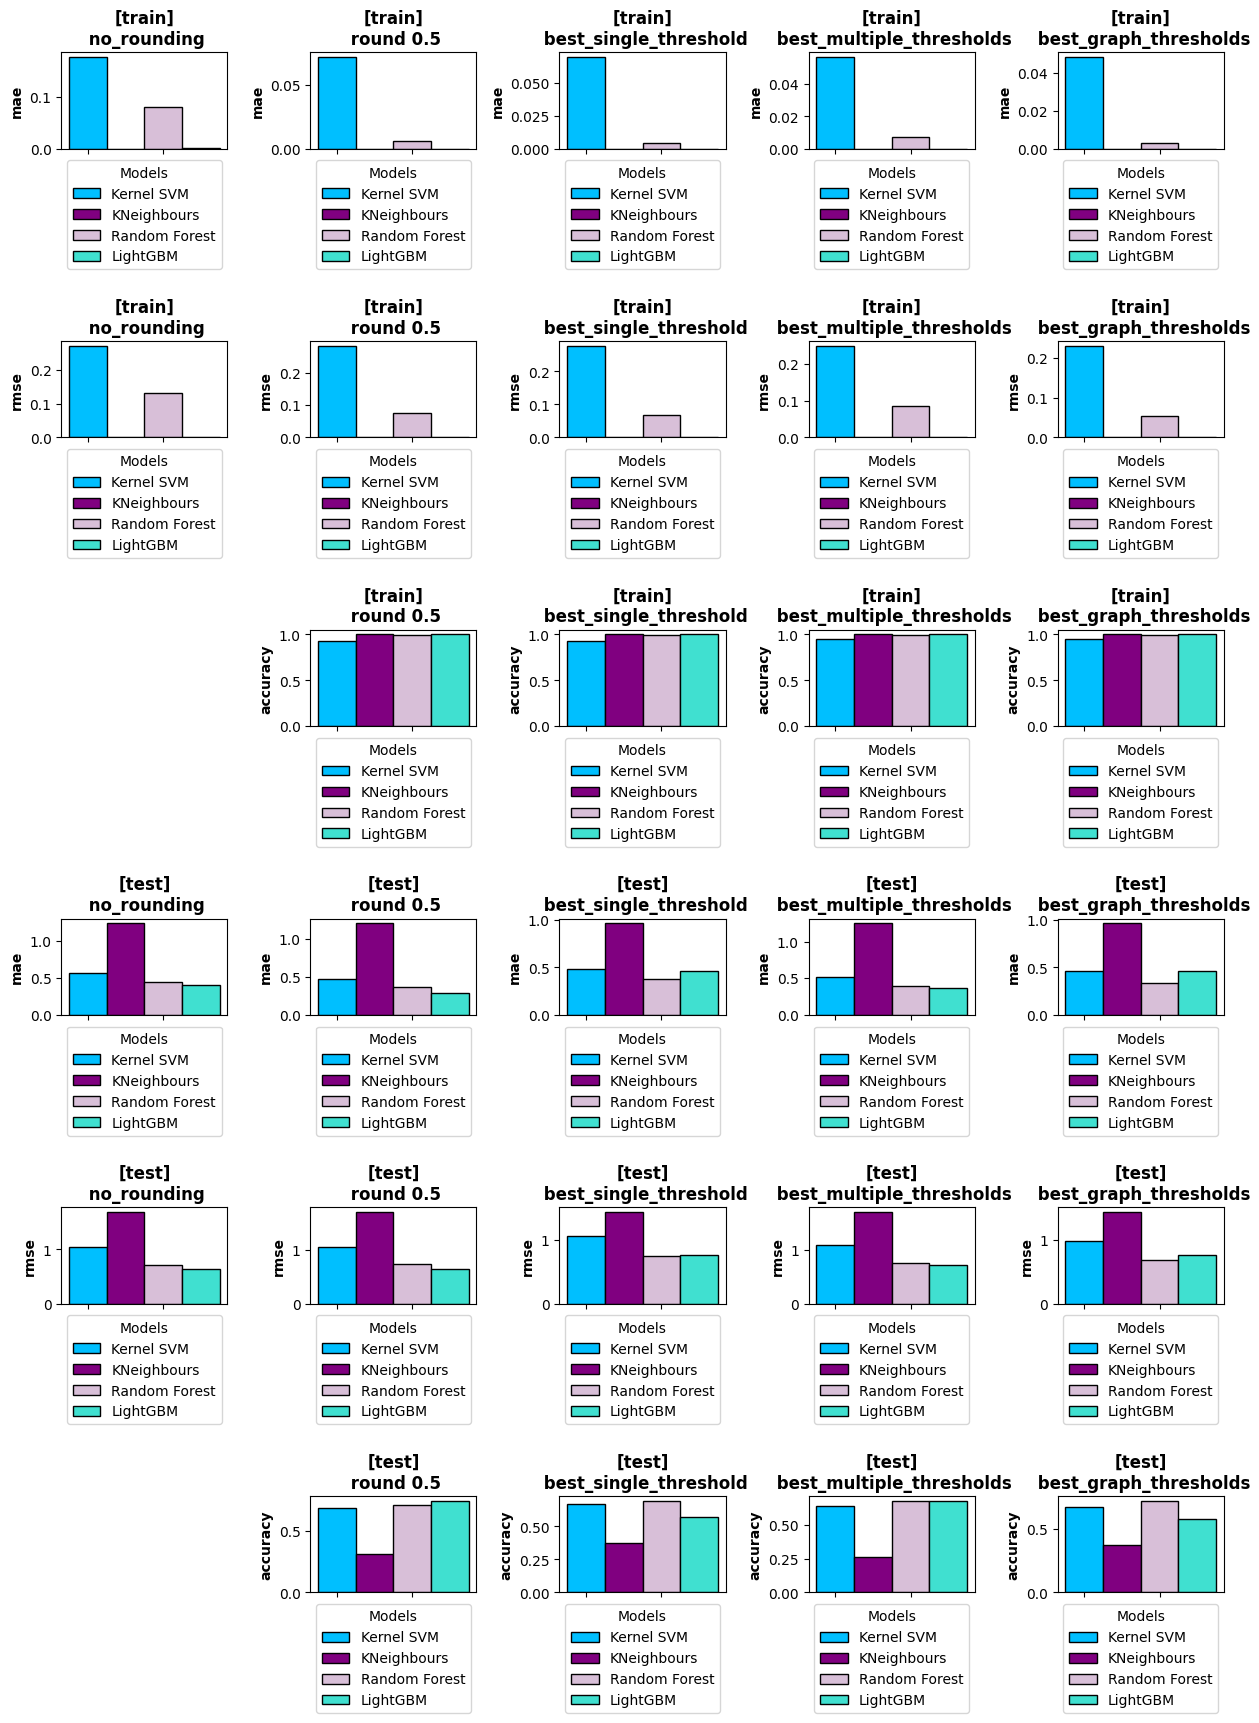

In [78]:
from training.results import plot_results


plot_results(
    results,
    measure_types=["mae", "rmse", "accuracy"],
    figsize=(6, 20),
    sets=[
        "train",
        "test",
    ],
    rounding_types=["no_rounding", "round 0.5", "best"],
    hspace=2,
    wspace=0.5,
)

In [75]:
from training.train_and_evaluate_models import print_results

for model_name, model in results.items():
    print_results(model_name, model)

In [79]:
results = train_and_evaluate_models(
    [
        "kernel_svm",
        "knn",
        "random_forest",
        "lightgbm",
    ],
    X_train,
    y_train,
    X_test,
    y_test,
    thresholds=[0.05 for i in range(5, 16)],
)

[I 2024-05-18 19:26:00,875] A new study created in memory with name: no-name-b42631a8-efd4-4f7f-bdf9-8f46ccef473e
[I 2024-05-18 19:26:00,881] Trial 0 finished with value: 0.08830022075055188 and parameters: {'level_-1': 0.29278687364417944, 'level_0': 0.557962378861572, 'level_1': 0.25540157785972284, 'level_2': 0.629204373758165, 'level_3': 0.4492753471190576, 'level_4': 0.538167332219517, 'level_5': 0.5262331571729375, 'level_6': 0.2845328853080833, 'level_7': 0.37489946293187226, 'level_8': 0.5017149196793677, 'level_9': 0.339678121100297, 'level_10': 0.4662986477411426, 'level_11': 0.2814436393155065, 'level_12': 0.36956156185470673, 'level_13': 0.28476009460735857, 'level_14': 0.3210372752659089, 'level_15': 0.4147561479402068, 'level_16': 0.5356805990159714, 'level_17': 0.4678304334827815, 'level_18': 0.7003585376706571, 'level_19': 0.7214701188479125, 'level_20': 0.445524592642395}. Best is trial 0 with value: 0.08830022075055188.
[I 2024-05-18 19:26:00,885] Trial 1 finished wit

{-1: 0.75, 0: 0.30000000000000004, 1: 0.4, 2: 0.30000000000000004, 3: 0.5, 4: 0.5, 5: 0.55, 6: 0.4, 7: 0.45, 8: 0.45, 9: 0.25, 10: 0.35000000000000003, 11: 0.25, 12: 0.25, 13: 0.25, 14: 0.30000000000000004, 15: 0.25, 16: 0.4, 17: 0.25, 18: 0.25, 19: 0.25, 20: 0.25}


[I 2024-05-18 19:26:11,332] Trial 10 finished with value: 0.0 and parameters: {'level_-1': 0.2705074803132791, 'level_0': 0.28139400856306146, 'level_1': 0.25550241688688297, 'level_2': 0.41985109684709665, 'level_3': 0.5743201506615124, 'level_4': 0.7428129451753092, 'level_5': 0.7083914949424608, 'level_6': 0.26651063397918445, 'level_7': 0.25334674212008734, 'level_8': 0.25551268836952257, 'level_9': 0.5624325112643289, 'level_10': 0.6239163857364429, 'level_11': 0.7432994624698408, 'level_12': 0.46176392509154407, 'level_13': 0.4308287039219037, 'level_14': 0.740556003308618, 'level_15': 0.743104326487928, 'level_16': 0.7492539980389269, 'level_17': 0.38839058063045445, 'level_18': 0.5672609765436486, 'level_19': 0.7469337493348003, 'level_20': 0.2546700421101439}. Best is trial 0 with value: 0.0.
[I 2024-05-18 19:26:11,445] Trial 11 finished with value: 0.0 and parameters: {'level_-1': 0.40631512625455635, 'level_0': 0.428223152232614, 'level_1': 0.42409832618116516, 'level_2': 0.

{-1: 0.25, 0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25, 4: 0.25, 5: 0.25, 6: 0.25, 7: 0.25, 8: 0.25, 9: 0.25, 10: 0.25, 11: 0.25, 12: 0.25, 13: 0.25, 14: 0.25, 15: 0.25, 16: 0.25, 17: 0.25, 18: 0.25, 19: 0.25, 20: 0.25}


[I 2024-05-18 19:26:22,167] A new study created in memory with name: no-name-d14a72ca-5986-439d-a1de-0ad60f0683dd
[I 2024-05-18 19:26:22,176] Trial 0 finished with value: 0.008830022075055188 and parameters: {'level_-1': 0.6105637320886906, 'level_0': 0.6258998722696303, 'level_1': 0.329573399813147, 'level_2': 0.6757560029034471, 'level_3': 0.7034817082810914, 'level_4': 0.335532756297164, 'level_5': 0.6312348300537487, 'level_6': 0.6345585899425032, 'level_7': 0.4020874335935158, 'level_8': 0.25933109987500713, 'level_9': 0.4525418849937588, 'level_10': 0.4565769113415527, 'level_11': 0.3198330528849351, 'level_12': 0.49947223795528667, 'level_13': 0.6173901524102334, 'level_14': 0.378196790048286, 'level_15': 0.46267110407185336, 'level_16': 0.6687462945431772, 'level_17': 0.6295386515944028, 'level_18': 0.7046233933714428, 'level_19': 0.3354310264024289, 'level_20': 0.36240699219181977}. Best is trial 0 with value: 0.008830022075055188.
[I 2024-05-18 19:26:22,181] Trial 1 finished 

{-1: 0.35000000000000003, 0: 0.35000000000000003, 1: 0.30000000000000004, 2: 0.45, 3: 0.25, 4: 0.25, 5: 0.30000000000000004, 6: 0.25, 7: 0.30000000000000004, 8: 0.25, 9: 0.25, 10: 0.30000000000000004, 11: 0.25, 12: 0.45, 13: 0.25, 14: 0.25, 15: 0.25, 16: 0.30000000000000004, 17: 0.30000000000000004, 18: 0.25, 19: 0.25, 20: 0.25}


[I 2024-05-18 19:26:32,705] A new study created in memory with name: no-name-746c0b71-31d6-43db-afe8-dff41b03472f
[I 2024-05-18 19:26:32,714] Trial 0 finished with value: 0.0 and parameters: {'level_-1': 0.5923686060305312, 'level_0': 0.6334554866683407, 'level_1': 0.28793669948908834, 'level_2': 0.49769328174077887, 'level_3': 0.4019781434050757, 'level_4': 0.509260038536949, 'level_5': 0.6439537798881985, 'level_6': 0.3271784386262742, 'level_7': 0.40779987678097074, 'level_8': 0.37598964716574484, 'level_9': 0.2592007965066024, 'level_10': 0.4432528744572547, 'level_11': 0.5246576085357739, 'level_12': 0.6920404349875615, 'level_13': 0.6184951497244122, 'level_14': 0.3486412685903527, 'level_15': 0.28361895278371585, 'level_16': 0.33060981531612293, 'level_17': 0.5804827097814729, 'level_18': 0.4596381812911832, 'level_19': 0.7130384410359283, 'level_20': 0.39698038628552984}. Best is trial 0 with value: 0.0.
[I 2024-05-18 19:26:32,722] Trial 1 finished with value: 0.0 and parameter

{-1: 0.25, 0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25, 4: 0.25, 5: 0.25, 6: 0.25, 7: 0.25, 8: 0.25, 9: 0.25, 10: 0.25, 11: 0.25, 12: 0.25, 13: 0.25, 14: 0.25, 15: 0.25, 16: 0.25, 17: 0.25, 18: 0.25, 19: 0.25, 20: 0.25}


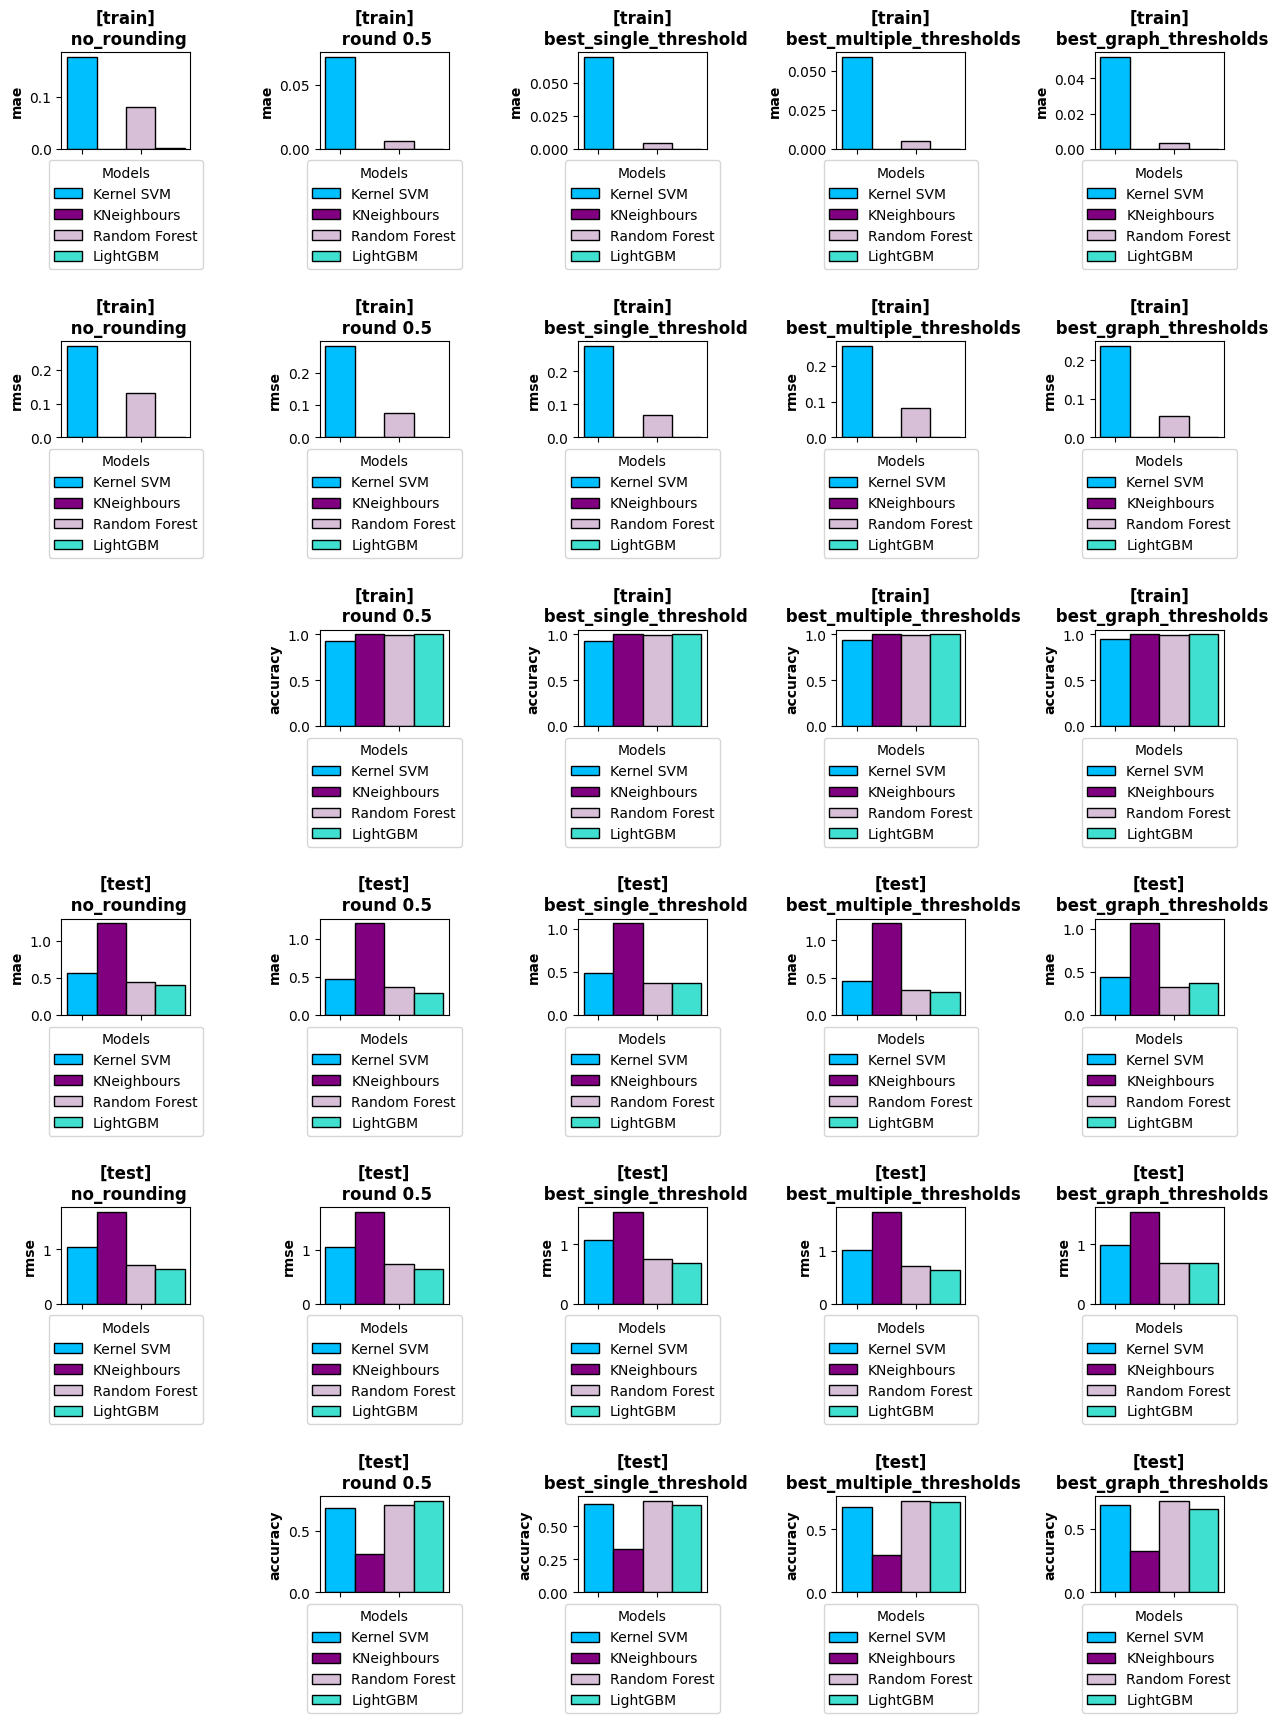

In [80]:
from training.train_and_evaluate_models import train_and_evaluate_models


results = train_and_evaluate_models(
    [
        "linear_regression",
    ],
    X_train,
    y_train,
    X_test,
    y_test,
    thresholds=[0.05 for i in range(1, 20)],
    print_summary=False,
)

In [81]:
results

==== kernel_svm ====
	--> no_rounding
		--> train
			--> rmse: 0.2709546148033673
			--> mae: 0.17606718192161624
		--> test
			--> rmse: 1.0359407498545896
			--> mae: 0.564048215241779
	--> round 0.5
		--> train
			--> rmse: 0.28450284536598086
			--> mae: 0.07211184694628403
			--> accuracy: 0.9315673289183223
		--> test
			--> rmse: 1.0641207361838554
			--> mae: 0.47058823529411764
			--> accuracy: 0.6801470588235294
	--> best_single_threshold
		--> threshold
			--> 0.55
		--> train
			--> rmse: 0.2779616756978071
			--> mae: 0.06990434142752024
			--> accuracy: 0.9330389992641648
		--> test
			--> rmse: 1.06929058395797
			--> mae: 0.48161764705882354
			--> accuracy: 0.6691176470588235
	--> best_multiple_thresholds
		--> thresholds
			--> -1: 0.7250030838899472
			--> 0: 0.5776827422669403
			--> 1: 0.4382435236741495
			--> 2: 0.4920827323525746
			--> 3: 0.4980496782898549
			--> 4: 0.5181033606073091
			--> 5: 0.4917300823002626
			--> 6: 0.46876681058661174
			--> 7: 0.54815

In [84]:
from training.results import plot_results


plot_results(
    results,
    measure_types=["mae", "rmse", "accuracy"],
    figsize=(15, 20),
    sets=[
        "train",
        "test",
    ],
    rounding_types=[
        "no_rounding",
        "round 0.5",
        "best_single_threshold",
        "best_multiple_thresholds",
        "best_graph_thresholds",
    ],
    hspace=2,
    wspace=1,
)

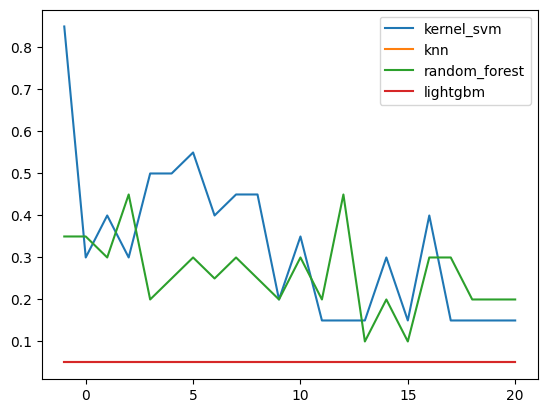

In [85]:
model = results["linear_regression"]["model"]

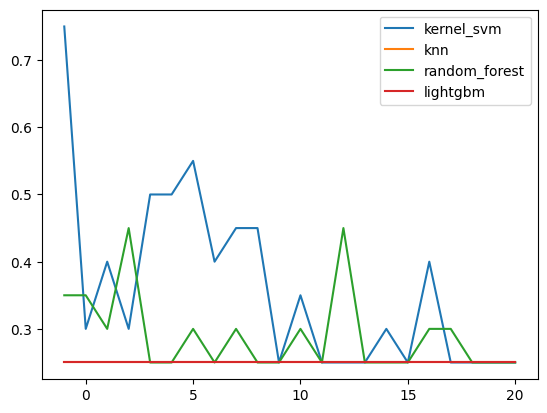

In [86]:
y_pred_train = model.predict(X_train)

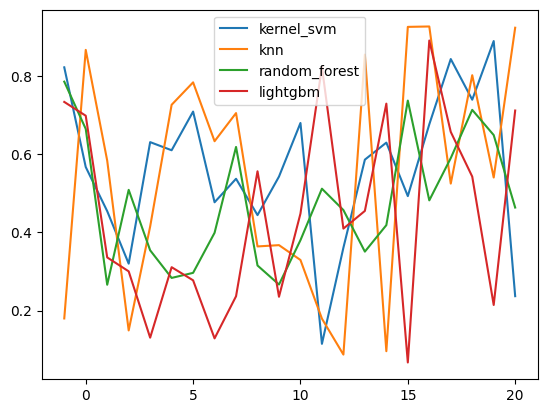

In [87]:
from queue import PriorityQueue
from training.rounging import round_prediction_error


def moves_cost(level, thresholds, y_pred, y_true):
    lvl_pred = [pred for pred in range(len(y_pred)) if y_pred[pred] // 1 == level]
    n = len(lvl_pred)
    moves = []
    for threshold in thresholds:
        moves.append(
            (
                threshold,
                sum(
                    [
                        round_prediction_error(y_pred[i], y_true[i], threshold)
                        for i in lvl_pred
                    ]
                )
                / n,
            )
        )

    return moves


def graph_rounding(y_pred, y_true, thresholds):
    q = PriorityQueue()
    final_thresholds = {}
    q.put((0, -1))

    while not q.empty():
        cost, level = q.get()
        if level == 21:
            return final_thresholds

        moves = moves_cost(level, thresholds, y_pred, y_true)
        threshold, next_cost = min(moves, key=lambda x: x[1])
        final_thresholds[level] = threshold
        q.put((cost + next_cost, level + 1))

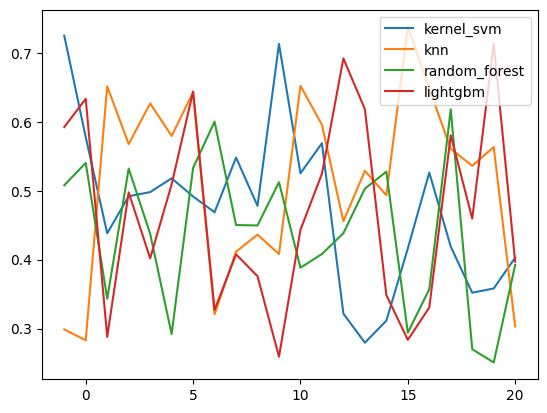

In [88]:
graph_rounding(list(y_pred_train), list(y_train), [0.1 * i for i in range(1, 10)])

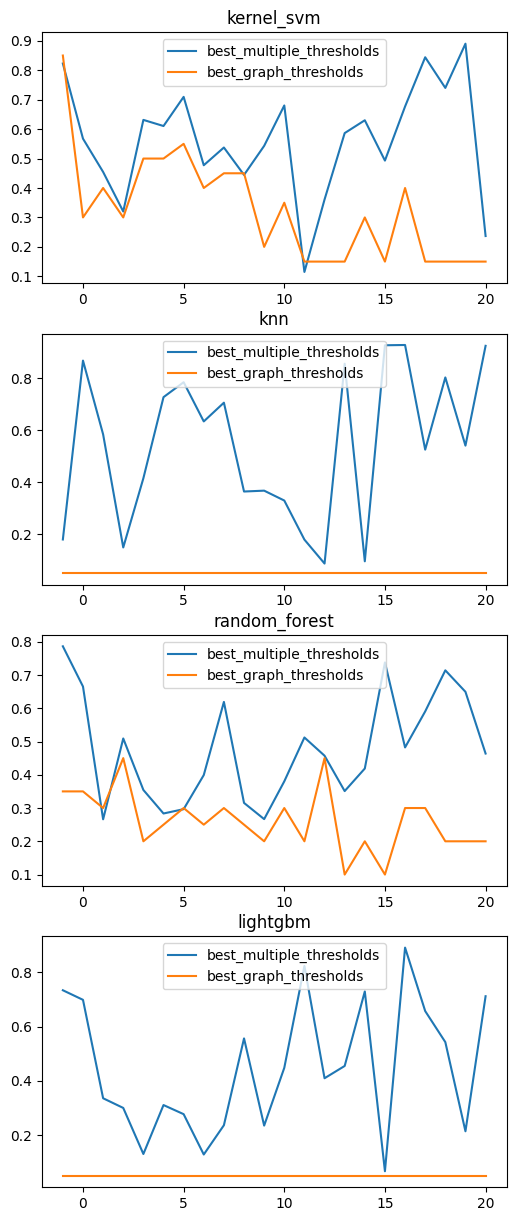